In [1]:
from textblob import TextBlob
import tweepy,sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#credentials
consumer_key = "****************************"
consumer_secret = "****************************"
Access_token = "****************************"
Access_token_secret = "****************************"

#setting authorization code for given user's data and calling client by provider.
auth = tweepy.OAuthHandler(consumer_key=consumer_key ,consumer_secret=consumer_secret)

#setting access_token which is a unique key
auth.set_access_token(key=Access_token, secret=Access_token_secret)

#API is established
api = tweepy.API(auth)

hashtag = input("Enter the #tag to search ")
n = int(input("Enter no. of tweets to search: [140,280] "))

tweets = tweepy.Cursor(api.search, q=hashtag, tweet_mode="extended").items(n)
#api.search is a query

def percentage(num,den):
    return (100 * (float(num)/float(den)))

def avg(tsum,tot):
    return (float(tsum)/float(tot))

polarity = 0.0
subjectivity = 0.0
tot_tweets = 0
pos_opinion = 0.0
pos_count = 0
neg_opinion = 0.0
neg_count = 0
neutral_opinion = 0.0
neutral_count = 0
pos_list = []
neg_list = []
neutral_list = []
final_polarity_list = []
final_subjectivity_list = []
pnn_list = []

print("--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--")
for tweet in tweets:
    tot_tweets+=1
    print(tweet.full_text)
    analysis = TextBlob(tweet.full_text)
    print(analysis.sentiment)
    print("--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--")
    
    final_polarity_list.append(analysis.sentiment.polarity)
    final_subjectivity_list.append(analysis.sentiment.subjectivity)
    polarity+=analysis.sentiment.polarity
        #opinion whether +ve or -ve [-1,1]
    subjectivity+=analysis.sentiment.subjectivity
        #states how factual it is
        #high subjectivity means strong opinion [0,1]
        #power of our opinion
        
    if(analysis.sentiment.polarity > 0.0):
        pos_count+=1
        pos_list.append(tweet.full_text)
        pnn_list.append("Positve")
        pos_opinion+=analysis.sentiment.polarity
        
    elif(analysis.sentiment.polarity < 0.0):
        neg_count+=1
        neg_list.append(tweet.full_text)
        pnn_list.append("Negative")
        neg_opinion+=analysis.sentiment.polarity
        
    elif(analysis.sentiment.polarity == 0.0):
        neutral_count+=1
        neutral_list.append(tweet.full_text)
        pnn_list.append("Neutral")
        neutral_opinion+=analysis.sentiment.polarity  

        
#....................

try:
    pos_avg = format(avg(pos_opinion,pos_count),'.2f')

except ZeroDivisionError:
    print("Err...Dividing by 0 since count of Positive tweets is 0")
    pos_avg = 'NULL'
    
try:
    pos_perc = format(percentage(pos_count,tot_tweets),'.2f')
    
except ZeroDivisionError:
    print("Err...Dividing by 0 since total tweets are 0")
    pos_perc = 'NULL' 
    
print("The status of Positive Sentiment over #{} for {} tweets is: Average {} & Percentage {}%".format(hashtag,n,pos_avg, pos_perc))
    



try:
    neg_avg = format(avg(neg_opinion,neg_count),'.2f')

except ZeroDivisionError:
    print("Err...Dividing by 0 since count of Negative tweets is 0")
    neg_avg = 'NULL'
    
try:
    neg_perc = format(percentage(neg_count,tot_tweets),'.2f')
    
except ZeroDivisionError:
    print("Err...Dividing by 0 since total tweets are 0")
    neg_perc = 'NULL' 
    
print("The status of Negative Sentiment over #{} for {} tweets is: Average {} & Percentage {}%".format(hashtag,n,neg_avg, neg_perc))
    



try:
    neutral_avg = format(avg(neutral_opinion,neutral_count),'.2f')

except ZeroDivisionError:
    print("Err...Dividing by 0 since count of Neutral tweets is 0")
    neutral_avg = 'NULL'
    
try:
    neutral_perc = format(percentage(neutral_count,tot_tweets),'.2f')
    
except ZeroDivisionError:
    print("Err...Dividing by 0 since total tweets are 0")
    neutral_perc = 'NULL' 
    
print("The status of Neutral Sentiment over #{} for {} tweets is: Average {} & Percentage {}%".format(hashtag,n,neutral_avg, neutral_perc))


print("tot_tweets {}".format(tot_tweets))
print("pos_count {}".format(pos_count))
print("neg_count {}".format(neg_count))
print("neutral_count {}".format(neutral_count))
print("pos_opinion {}".format(pos_opinion))
print("neg_opinion {}".format(neg_opinion))
print("neutral_opinion {}".format(neutral_opinion))


#print("pos_list {}".format(pos_list))
#print("neg_list {}".format(neg_list))
#print("neutral_list {}".format(neutral_list))

#print("pos_list {}".format(pos_list))
#print(len(pos_list))
pos_rem_tweet = tot_tweets - len(pos_list)
#print(pos_rem_tweet)
for i in range(pos_rem_tweet):
    pos_list.append("--")
#print("pos_list {}".format(pos_list))
#print("------------------------------------------------------------------")
#print("neg_list {}".format(neg_list))
#print(len(neg_list))
neg_rem_tweet = tot_tweets - len(neg_list)
#print(neg_rem_tweet)
for i in range(neg_rem_tweet):
    neg_list.append("--")
#print("neg_list {}".format(neg_list))
#print("------------------------------------------------------------------")
#print("neutral_list {}".format(neutral_list))
#print(len(neutral_list))
neutral_rem_tweet = tot_tweets - len(neutral_list)
#print(neutral_rem_tweet)
for i in range(neutral_rem_tweet):
    neutral_list.append("--")
#print("neutral_list {}".format(neutral_list))
#print("------------------------------------------------------------------")


print("The final status of Sentiments over #{} for {} tweets is: ".format(hashtag,n)) 
polarity = polarity/tot_tweets
subjectivity= subjectivity/tot_tweets

print("Final Polarity: ")
if(polarity > 0.0):
    print("POSITIVE with " + str(polarity))

elif(polarity < 0.0):
    print("NEGATIVE with " + str(polarity))
    
elif(polarity == 0.0):
    print("NEUTRAL with " + str(polarity))

print("Final Subjectivity: ")    
if(subjectivity > 0.0):
    print("POSITIVE with " + str(subjectivity))

elif(subjectivity < 0.0):
    print("NEGATIVE with " + str(subjectivity))
    
elif(subjectivity == 0.0):
    print("NEUTRAL with " + str(subjectivity))
    


    
    
    

Enter the #tag to search stree
Enter no. of tweets to search: [140,280] 20
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...
1. #Padmaavat [Jan]
2. #SKTKS [Feb]
3. #Raid [March]
4. #Baaghi2…
Sentiment(polarity=0.0, subjectivity=0.0)
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...
1. #Padmaavat [Jan]
2. #SKTKS [Feb]
3. #Raid [March]
4. #Baaghi2…
Sentiment(polarity=0.0, subjectivity=0.0)
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...
1. #Padmaavat [Jan]
2. #SKTKS [Feb]
3. #Raid [March]
4. #Baaghi2…
Sentiment(polarity=0.0, subjectivity=0.0)
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...
1. #Padmaavat

In [2]:
pd.set_option("display.max_colwidth",-1)
my_data = [("Positive",pos_list ),("Negative",neg_list ),("Neutral", neutral_list)]
df = pd.DataFrame.from_items(my_data)
df

,Positive,Negative,Neutral
0,RT @SuchAMisfit: Stree is such a good movie and I really admire how it promotes feminism in such a unique manner and especially talks about…,RT @taran_adarsh: #Stree is all set to cross ₹ 💯 cr today [Sat; Day 16]... Will be the ninth Hindi film to cruise past ₹ 100 cr mark in 201…,RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...\n1. #Padmaavat [Jan]\n2. #SKTKS [Feb]\n3. #Raid [March]\n4. #Baaghi2…
1,"@RajkummarRao stree.. wonderful movie, wonderful comic...u vr amazing,esp with lukin in eyes of witch.. pyarr se... 😂😂 great work all of u..",RT @taran_adarsh: #Stree is all set to cross ₹ 💯 cr today [Sat; Day 16]... Will be the ninth Hindi film to cruise past ₹ 100 cr mark in 201…,RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...\n1. #Padmaavat [Jan]\n2. #SKTKS [Feb]\n3. #Raid [March]\n4. #Baaghi2…
2,RT @ShraddhaKNet: The gorgeous #Stree @ShraddhaKapoor today for the success bash of stree 🙌❤️ https://t.co/UFdYcf9VIB,RT @taran_adarsh: #Stree is all set to cross ₹ 💯 cr today [Sat; Day 16]... Will be the ninth Hindi film to cruise past ₹ 100 cr mark in 201…,RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...\n1. #Padmaavat [Jan]\n2. #SKTKS [Feb]\n3. #Raid [March]\n4. #Baaghi2…
3,#Stree is in 90s with ₹2.05cr net in its third Friday. 15 days total now stands at ₹91.16cr net. It will touch ₹100cr mark on Sunday.\nFirst Week ₹55.58cr\nSecond Week ₹33.58cr\nThird Friday ₹2.05cr\nTotal ₹91.16cr nett\nSUPER HIT\n@RajkummarRao @ShraddhaKapoor,"RT @ShraddhaxDaily: [VIDEO] Our gorgeous #Stree, @ShraddhaKapoor dancing to her superhit song #MilegiMilegi at @VeetIndia event in Mumbai t…",RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...\n1. #Padmaavat [Jan]\n2. #SKTKS [Feb]\n3. #Raid [March]\n4. #Baaghi2…
4,"RT @AnilKapoor: #Stree is a great showcase for the stupendous talents of @RajkummarRao &amp; @ShraddhaKapoor, &amp; indeed all the actors on screen…",--,RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...\n1. #Padmaavat [Jan]\n2. #SKTKS [Feb]\n3. #Raid [March]\n4. #Baaghi2…
5,@Dave_Stree It's called giving your players freedom from expectation. It's how we've come this far and it's how we'll go all the way.,--,RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...\n1. #Padmaavat [Jan]\n2. #SKTKS [Feb]\n3. #Raid [March]\n4. #Baaghi2…
6,RT @SRKFanMadhulika: Stree Stree hai purush nhi\nWo bina ijajat k nhi uthayegi 👏👏\nBest dialogue from the movie \n#Stree \n2018 ki ab tak ki sa…,--,Watching Stree — at PVR Mira Road https://t.co/fjeUJECErn
7,--,--,RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...\n1. #Padmaavat [Jan]\n2. #SKTKS [Feb]\n3. #Raid [March]\n4. #Baaghi2…
8,--,--,RT @taran_adarsh: HINDI FILMS that made it to the ₹ 100 cr Club in 2018...\n1. #Padmaavat [Jan]\n2. #SKTKS [Feb]\n3. #Raid [March]\n4. #Baaghi2…
9,--,--,--


In [3]:
df.to_csv("my_tweet.csv")    
print("'mytweet.csv' file has been generated")

'mytweet.csv' file has been generated


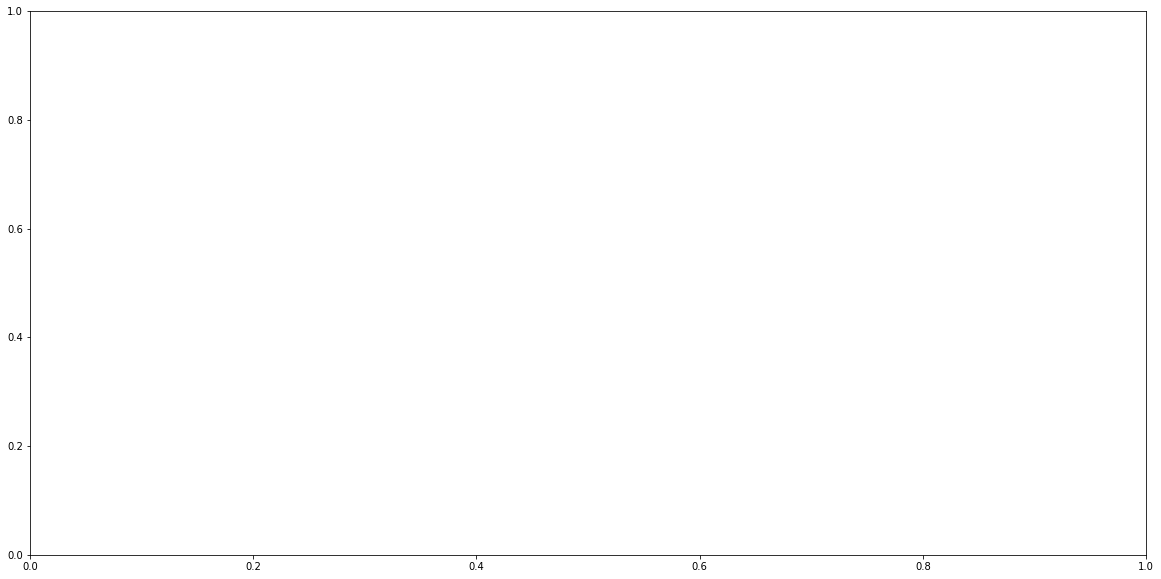

In [4]:
final_polarity_list.sort()

#print("final_polarity_list {}".format(final_polarity_list))
my_heatmap = [("Polarity",final_polarity_list )]
df = pd.DataFrame.from_items(my_heatmap)
#df

fig,ax = plt.subplots(figsize=(20,10))

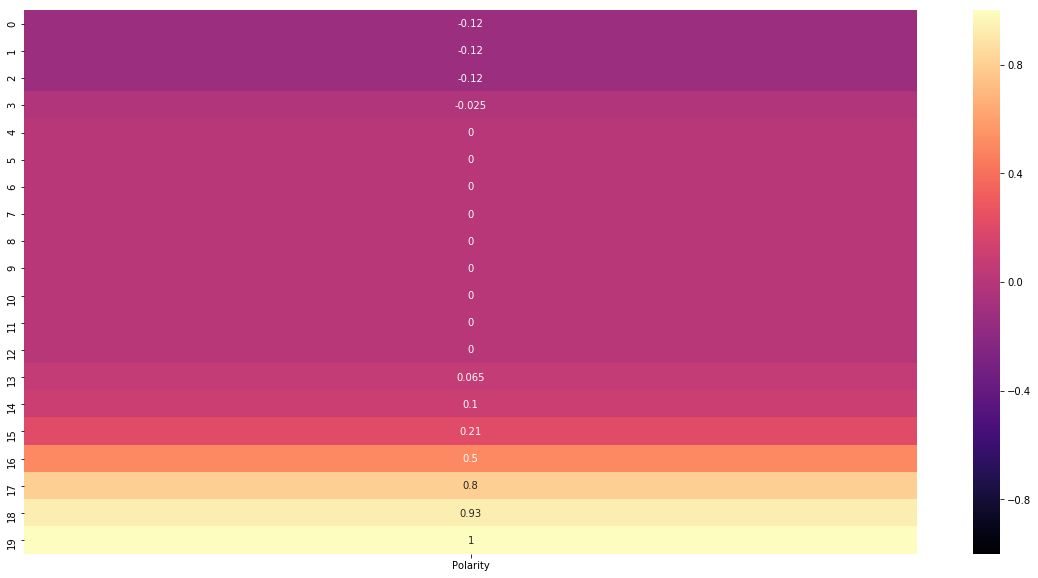

In [5]:
sns.heatmap(df, vmin=-1, vmax=1, center=0,annot=True,cmap="magma",ax=ax)
fig

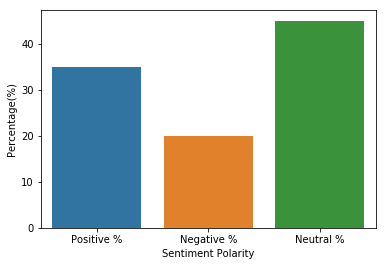

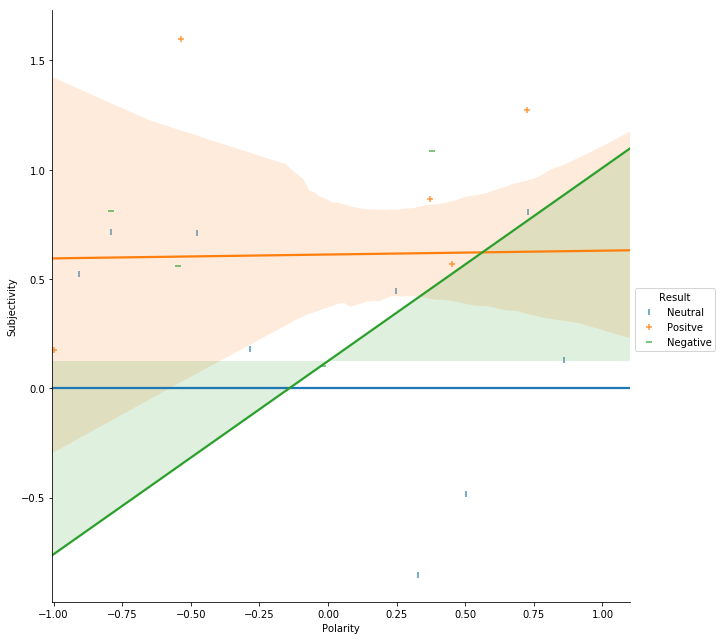

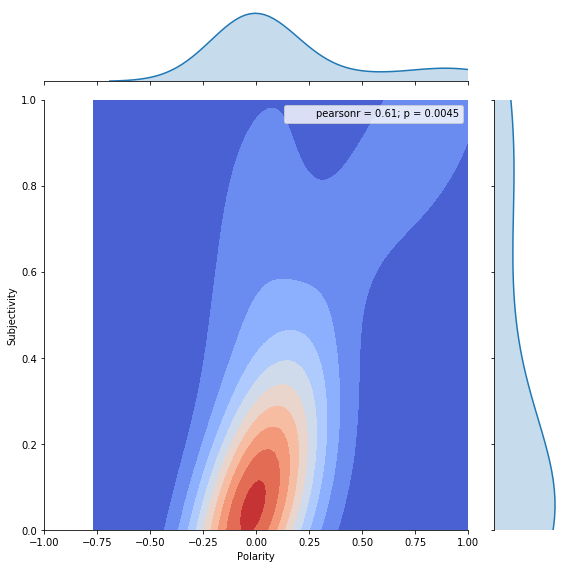

In [6]:
pos_perc=float(pos_perc)
neg_perc=float(neg_perc)
neutral_perc=float(neutral_perc)

my_bar1 = [["Positive %",pos_perc],["Negative %",neg_perc],["Neutral %",neutral_perc]]
dfbar = pd.DataFrame(my_bar1,columns=["Sentiment Polarity","Percentage(%)"])

sns.barplot(x='Sentiment Polarity',y='Percentage(%)',data=dfbar)

pvs = [("Polarity",final_polarity_list ),("Subjectivity",final_subjectivity_list ),("Result",pnn_list)]
dfpvs = pd.DataFrame.from_items(pvs)

#dfpvs

#sns.jointplot(x="Polarity",y="Subjectivity",data=dfpvs,kind="reg",color="r",size=7)
sns.lmplot(x="Polarity",y="Subjectivity",data=dfpvs,size=9,x_jitter=True,y_jitter=True,hue="Result",markers=['|','+','_'])
sns.jointplot(x="Polarity",y="Subjectivity",data=dfpvs,kind="kde",cmap="coolwarm",size=8,xlim=[-1.00,1.00],ylim=[0,1.0])
plt.tight_layout()